In [6]:
from xml.dom import expatbuilder
import numpy as np
import matplotlib.pyplot as plt
import struct
import os


In [7]:
# should be in the same directory as corresponding xml and csv
eis_filename = '/example/path/to/eis_image_file.dat'

In [8]:
image_fn, image_ext = os.path.splitext(eis_filename)
eis_xml_filename = image_fn + ".xml"

# crop xml

manually change the line and sample values in the xml to match (n_lines, n_samples)

In [9]:
eis_xml = expatbuilder.parse(eis_xml_filename, False)

In [10]:
eis_dom = eis_xml.getElementsByTagName("File_Area_Observational").item(0)

dom_lines = eis_dom.getElementsByTagName("Axis_Array").item(0)
dom_samples = eis_dom.getElementsByTagName("Axis_Array").item(1)

dom_lines = dom_lines.getElementsByTagName("elements")[0]
dom_samples = dom_samples.getElementsByTagName("elements")[0]

total_lines = int( dom_lines.childNodes[0].data )
total_samples = int( dom_samples.childNodes[0].data )

total_lines, total_samples

(2000, 4000)

# crop image

In [23]:

dn_size_bytes = 4  # number of bytes per DN

n_lines = 60  # how many to crop to
n_samples = 3

start_line = 1200 # point to start crop from
start_sample = 1200

image_offset = (start_line*total_samples + start_sample) * dn_size_bytes

line_length = n_samples * dn_size_bytes

buffer_size = n_lines * total_samples * dn_size_bytes


with open(eis_filename, 'rb') as f:
    f.seek(image_offset) 
    b_image_data = f.read()

In [24]:
b_image_data = np.frombuffer(b_image_data[:buffer_size], dtype=np.uint8)
b_image_data.shape

(960000,)

In [25]:
b_image_data = np.reshape(b_image_data, (n_lines, total_samples, dn_size_bytes) )
b_image_data.shape

(60, 4000, 4)

In [26]:
b_image_data = b_image_data[:,:n_samples,:]
b_image_data.shape

(60, 3, 4)

In [27]:
image_data = []
for i in range(n_lines):
    image_sample = []
    for j in range(n_samples):
        dn_bytes = bytearray(b_image_data[i,j,:])
        dn = struct.unpack( "<f", dn_bytes )
        image_sample.append(dn)
    image_data.append(image_sample)
image_data = np.array(image_data)
image_data.shape

(60, 3, 1)

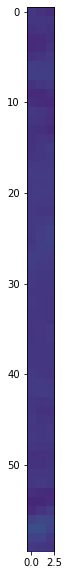

In [32]:
plt.figure(figsize=(10,10))
plt.imshow(image_data, vmin=0, vmax=1)

In [29]:
crop = "_cropped"
image_fn, image_ext = os.path.splitext(eis_filename)
mini_image_fn = image_fn + crop + image_ext
mini_image_bn = os.path.basename(mini_image_fn)

In [30]:
if os.path.exists(mini_image_fn):
  os.remove(mini_image_fn)

with open(mini_image_fn, 'ab+') as f:
    b_reduced_image_data = image_data.tobytes()
    f.write(b_reduced_image_data)

# crop times csv table

In [379]:
import pandas as pd

# assumes csv file has the same filename with _times appended
eis_csv_fn = image_fn + "_times.csv"
df1 = pd.read_csv(eis_csv_fn)
df1

,471,0.0003315
0,966,0.000773
1,1461,0.001216
2,471,0.001657
3,966,0.002099
4,1461,0.002541
5,471,0.002984
6,966,0.003426
7,1461,0.003867
8,471,0.004309
9,966,0.004751


In [380]:
x = np.array(df1)
y = x[:n_lines, :]
df = pd.DataFrame(y)
df

,0,1
0,966.0,0.000773
1,1461.0,0.001216
2,471.0,0.001657
3,966.0,0.002099
4,1461.0,0.002541
5,471.0,0.002984
6,966.0,0.003426
7,1461.0,0.003867
8,471.0,0.004309
9,966.0,0.004751


In [381]:
crop = "_cropped"
csv_fn, csv_ext = os.path.splitext(eis_csv_fn)
crop_csv_fn = csv_fn + crop + csv_ext
crop_csv_bn = os.path.basename(crop_csv_fn)
crop_csv_bn

'simulated_clipper_eis_nac_rolling_shutter_checkline_times_cropped.csv'

In [382]:
# write to file
if os.path.exists(crop_csv_fn):
  os.remove(crop_csv_fn)


df.to_csv( crop_csv_fn, header=False, index=False )